In [1]:
import json

from climateforcing.utils import mkdir_p
import fair
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import scipy.stats as st

## Set up plotting styles

In [2]:
pl.rcParams['figure.figsize'] = (12/2.54, 9/2.54)
pl.rcParams['font.size'] = 12
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['ytick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.major.left'] = True
pl.rcParams['ytick.major.right'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['ytick.right'] = True

## Load up saved output

In [3]:
df_in = {}
for var in ['temperature', 'ERFaer']:
    df_in[var] = pd.read_csv('../data_output/fair_{}/ssp126.csv'.format(var), index_col='year')

In [4]:
df_in['temperature']

,0,1,2,3,4,5,6,7,8,9,...,3741,3742,3743,3744,3745,3746,3747,3748,3749,3750
year,,,,,,,,,,,,,,,,,,,,,
1995.5,0.4580,0.5366,0.6343,0.4631,0.6899,0.5101,0.4512,0.4605,0.3840,0.5541,...,0.5417,0.4488,0.5117,0.5445,0.4990,0.6952,0.5967,0.5586,0.4903,0.4746
1996.5,0.5295,0.6097,0.6852,0.5336,0.7608,0.5815,0.5212,0.5383,0.4565,0.6117,...,0.6198,0.5164,0.6011,0.6197,0.5657,0.7544,0.6622,0.6295,0.5731,0.5601
1997.5,0.5837,0.6729,0.7306,0.5870,0.8196,0.6358,0.5657,0.5922,0.5043,0.6614,...,0.6890,0.5679,0.6769,0.6817,0.6212,0.8039,0.7233,0.6970,0.6359,0.6269
1998.5,0.6276,0.7255,0.7725,0.6292,0.8693,0.6770,0.5909,0.6276,0.5396,0.7044,...,0.7503,0.6085,0.7405,0.7318,0.6677,0.8472,0.7812,0.7616,0.6873,0.6813
1999.5,0.6852,0.7805,0.8116,0.6639,0.9199,0.7274,0.6400,0.6812,0.5824,0.7530,...,0.8053,0.6623,0.8002,0.7929,0.7198,0.8946,0.8358,0.8231,0.7289,0.7322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096.5,1.9644,1.5565,1.2702,1.0568,1.4138,2.3015,1.7254,2.2941,1.2170,1.8090,...,1.7256,1.5182,1.9969,2.2335,1.5000,1.5626,1.4828,1.6805,1.4318,1.2586
2097.5,1.9626,1.5494,1.2662,1.0532,1.4077,2.3064,1.7226,2.2936,1.2143,1.8048,...,1.7229,1.5129,1.9925,2.2276,1.4955,1.5570,1.4771,1.6744,1.4291,1.2547
2098.5,1.9609,1.5425,1.2622,1.0496,1.4016,2.3115,1.7200,2.2933,1.2117,1.8008,...,1.7202,1.5077,1.9883,2.2219,1.4911,1.5516,1.4715,1.6684,1.4264,1.2510


In [5]:
hadcrut5_df = pd.read_csv('../data_input/gsat/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.csv')

In [6]:
mkdir_p('../plots/')

In [7]:
n_ens = df_in['temperature'].shape[1]
n_ens

3751

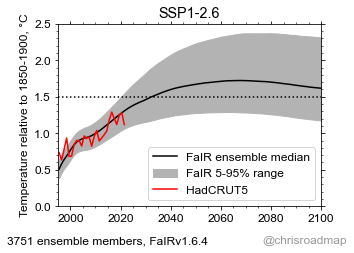

In [8]:
fig,ax=pl.subplots()
ax.plot(np.arange(1995.5,2101), np.median(df_in['temperature'], axis=1), color='k', label='FaIR ensemble median')
ax.fill_between(np.arange(1995.5,2101), np.percentile(df_in['temperature'], 5, axis=1), np.percentile(df_in['temperature'], 95, axis=1), label='FaIR 5-95% range', color="0.7")
ax.plot(np.arange(1995.5,2022), hadcrut5_df.loc[145:171,'Anomaly (deg C)']-hadcrut5_df.loc[0:50,'Anomaly (deg C)'].mean(), color='r', label='HadCRUT5')
ax.set_xlim(1995,2100)
ax.set_ylim(0,2.5)
ax.axhline(1.5, ls=':', color='k')
ax.set_title('SSP1-2.6')
ax.legend(loc='lower right')
ax.set_ylabel('Temperature relative to 1850-1900, °C')
pl.figtext(1,0.02,'@chrisroadmap',ha='right', color='0.6')
pl.figtext(0,0.02,f'{n_ens} ensemble members, FaIRv{fair.__version__}')
#ax.text(0.99,0.01,'FaIRv1.6.2 2237 constrained ensemble members', transform=ax.transAxes, ha='right')
#ax.text(0.99,)
fig.tight_layout(rect=[0.0,0.05,1,1])
fig.patch.set_facecolor('white')
pl.savefig('../plots/ssp126-default.png')

In [9]:
df_in['ERFaer'].loc[2019.5].mean()

-0.8969182084777393

In [10]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=79)
constraint1 = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(df_in['ERFaer'].loc[2019.5,str(i)], loc=-1.58, scale=0.10)/st.norm.pdf(-1.58, loc=-1.58, scale=0.10)
    if likelihood>=accept_prob[i]:
        constraint1[i] = True
    #print(likelihood)
np.sum(constraint1)

86

(array([ 3.,  6., 11., 17., 22., 15.,  6.,  3.,  2.,  1.]),
 array([-1.73   , -1.67729, -1.62458, -1.57187, -1.51916, -1.46645,
        -1.41374, -1.36103, -1.30832, -1.25561, -1.2029 ]),
 <BarContainer object of 10 artists>)

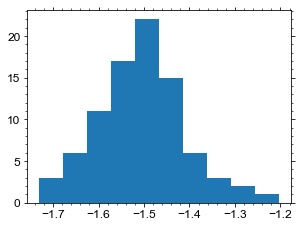

In [11]:
pl.hist(df_in['ERFaer'].loc[2019.5,constraint1])

In [12]:
df_in['ERFaer'].loc[2019.5,constraint1].mean()

-1.50453488372093

In [13]:
df_in['ERFaer'].loc[2019.5,constraint1].std()

0.09757313850156273

In [14]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=80)
constraint2 = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(df_in['ERFaer'].loc[2019.5,str(i)], loc=-0.44, scale=0.105)/st.norm.pdf(-0.44, loc=-0.44, scale=0.105)
    if likelihood>=accept_prob[i]:
        constraint2[i] = True
    #print(likelihood)
np.sum(constraint2)

375

(array([11., 32., 40., 88., 73., 81., 32., 13.,  4.,  1.]),
 array([-0.7484 , -0.69014, -0.63188, -0.57362, -0.51536, -0.4571 ,
        -0.39884, -0.34058, -0.28232, -0.22406, -0.1658 ]),
 <BarContainer object of 10 artists>)

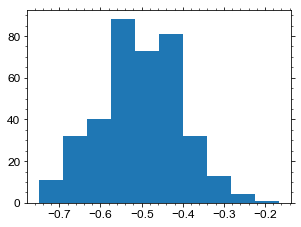

In [15]:
pl.hist(df_in['ERFaer'].loc[2019.5,constraint2])

In [16]:
df_in['ERFaer'].loc[2019.5,constraint2].mean()

-0.5017159999999999

In [17]:
df_in['ERFaer'].loc[2019.5,constraint2].std()

0.09897231455375964

In [18]:
np.median(df_in['temperature'], axis=1)

array([0.5076, 0.5801, 0.6383, 0.6871, 0.7391, 0.7935, 0.8416, 0.8786,
       0.9023, 0.9196, 0.9332, 0.9419, 0.9516, 0.9672, 0.9863, 1.0078,
       1.0321, 1.0566, 1.0849, 1.1126, 1.1398, 1.1681, 1.1968, 1.2245,
       1.2514, 1.2785, 1.3057, 1.3285, 1.3515, 1.3708, 1.3903, 1.4061,
       1.4224, 1.4365, 1.4514, 1.4677, 1.4841, 1.4997, 1.5151, 1.5283,
       1.5427, 1.557 , 1.5694, 1.5814, 1.5933, 1.6035, 1.6133, 1.6219,
       1.6297, 1.6373, 1.6439, 1.6502, 1.6556, 1.6623, 1.6673, 1.6728,
       1.6784, 1.6825, 1.6885, 1.6921, 1.6949, 1.6987, 1.7025, 1.706 ,
       1.7089, 1.7131, 1.7153, 1.7183, 1.719 , 1.7196, 1.7211, 1.7215,
       1.7221, 1.7218, 1.7209, 1.7198, 1.7188, 1.7166, 1.7145, 1.713 ,
       1.7107, 1.7087, 1.7078, 1.7052, 1.702 , 1.6979, 1.6943, 1.6909,
       1.6866, 1.6818, 1.6779, 1.6733, 1.6695, 1.6649, 1.6588, 1.6549,
       1.65  , 1.6451, 1.6411, 1.6374, 1.6318, 1.6285, 1.6246, 1.6213,
       1.6182, 1.6161])

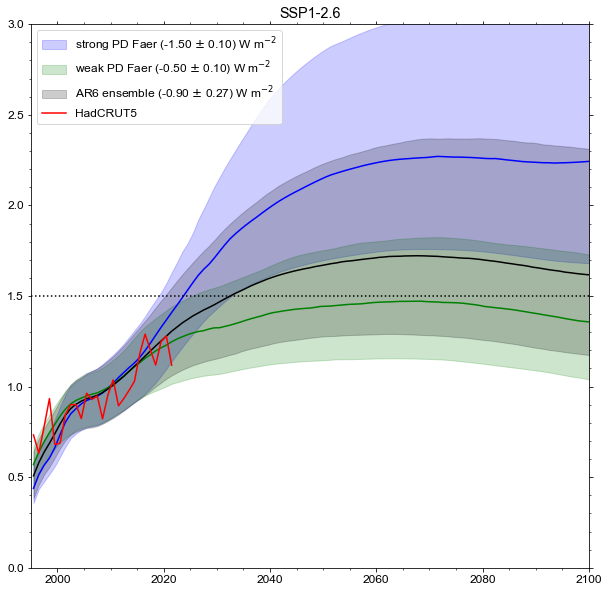

In [19]:
fig,ax=pl.subplots(figsize=(10,10))
ax.plot(np.arange(1995.5,2101), np.median(df_in['temperature'].loc[:,constraint1], axis=1), color='b')
ax.fill_between(np.arange(1995.5,2101), np.percentile(df_in['temperature'].loc[:,constraint1], 5, axis=1), np.percentile(df_in['temperature'].loc[:,constraint1], 95, axis=1), color="b", alpha=0.2, label='strong PD Faer (%.2f $\pm$ %.2f) W m$^{-2}$' % (df_in['ERFaer'].loc[2019.5,constraint1].mean(), df_in['ERFaer'].loc[2019.5,constraint1].std()))
ax.plot(np.arange(1995.5,2101), np.median(df_in['temperature'].loc[:,constraint2], axis=1), color='g')
ax.fill_between(np.arange(1995.5,2101), np.percentile(df_in['temperature'].loc[:,constraint2], 5, axis=1), np.percentile(df_in['temperature'].loc[:,constraint2], 95, axis=1), color="g", alpha=0.2, label='weak PD Faer (%.2f $\pm$ %.2f) W m$^{-2}$' % (df_in['ERFaer'].loc[2019.5,constraint2].mean(), df_in['ERFaer'].loc[2019.5,constraint2].std()))
ax.plot(np.arange(1995.5,2101), np.median(df_in['temperature'], axis=1), color='k')
ax.fill_between(np.arange(1995.5,2101), np.percentile(df_in['temperature'], 5, axis=1), np.percentile(df_in['temperature'], 95, axis=1), label='AR6 ensemble (%.2f $\pm$ %.2f) W m$^{-2}$' % (df_in['ERFaer'].loc[2019.5,:].mean(), df_in['ERFaer'].loc[2019.5,:].std()), color="k", alpha=0.2)
ax.plot(np.arange(1995.5,2022), hadcrut5_df.loc[145:171,'Anomaly (deg C)']-hadcrut5_df.loc[0:50,'Anomaly (deg C)'].mean(), color='r', label='HadCRUT5')
ax.set_xlim(1995,2100)
ax.set_ylim(0,3)
ax.axhline(1.5, ls=':', color='k')
ax.legend(loc='upper left')
ax.set_title('SSP1-2.6')
pl.savefig('../plots/ssp126_three_aer_forcings.png')

## Characterise by ECS

In [20]:
with open('../data_input/ar6-fair-samples/fair-1.6.2-wg3-params-slim-reconstrained.json') as f:
    config_list_variable = json.load(f)

In [21]:
def get_ecs(cfg):
    return(cfg['F2x']/cfg['lambda_global'])

In [22]:
ecs = np.zeros(n_ens)
for i, cfg in enumerate(config_list_variable):
    ecs[i] = get_ecs(cfg)

[2.04200537 2.3413273  2.95374193 3.9547568  5.12734391]


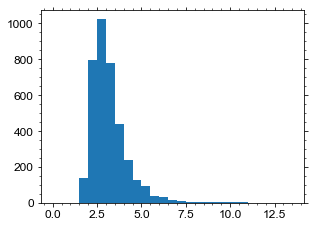

In [23]:
pl.hist(ecs, bins=np.arange(0, 14, 0.5))
print(np.percentile(ecs, (5, 16, 50, 84, 95)))

In [24]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=81)
high_ecs = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(ecs[i], loc=4.8, scale=0.5)/st.norm.pdf(4.8, loc=4.8, scale=0.5)
    if likelihood>=accept_prob[i]:
        high_ecs[i] = True
    #print(likelihood)
np.sum(high_ecs)

391

In [25]:
ecs[high_ecs].mean(), ecs[high_ecs].std()

(4.505923461326605, 0.5232899042985915)

(array([  1.,   5.,  35.,  57., 106.,  86.,  68.,  27.,   4.,   2.]),
 array([2.76815006, 3.11841803, 3.46868599, 3.81895396, 4.16922193,
        4.5194899 , 4.86975787, 5.22002583, 5.5702938 , 5.92056177,
        6.27082974]),
 <BarContainer object of 10 artists>)

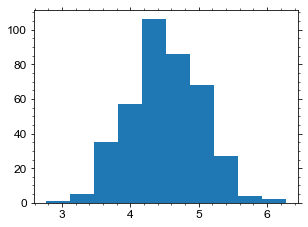

In [26]:
pl.hist(ecs[high_ecs])

In [27]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=82)
low_ecs = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(ecs[i], loc=1.9, scale=0.5)/st.norm.pdf(1.9, loc=1.9, scale=0.5)
    if likelihood>=accept_prob[i]:
        low_ecs[i] = True
    #print(likelihood)
np.sum(low_ecs)

1013

In [28]:
ecs[low_ecs].mean(), ecs[low_ecs].std()

(2.340180625228239, 0.30374260021253857)

(array([ 35., 139., 191., 238., 208., 109.,  65.,  19.,   6.,   3.]),
 array([1.66424543, 1.84871323, 2.03318102, 2.21764882, 2.40211662,
        2.58658441, 2.77105221, 2.95552   , 3.1399878 , 3.32445559,
        3.50892339]),
 <BarContainer object of 10 artists>)

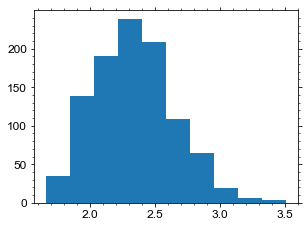

In [29]:
pl.hist(ecs[low_ecs])

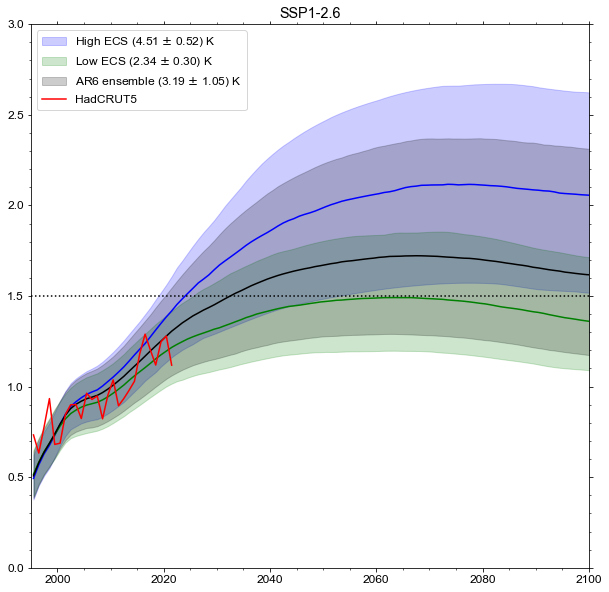

In [30]:
fig,ax=pl.subplots(figsize=(10,10))

ax.plot(np.arange(1995.5,2101), np.median(df_in['temperature'].loc[:,high_ecs], axis=1), color='b')
ax.fill_between(np.arange(1995.5,2101), np.percentile(df_in['temperature'].loc[:,high_ecs], 5, axis=1), np.percentile(df_in['temperature'].loc[:,high_ecs], 95, axis=1), color="b", alpha=0.2, label='High ECS (%.2f $\pm$ %.2f) K' % (ecs[high_ecs].mean(), ecs[high_ecs].std()))
ax.plot(np.arange(1995.5,2101), np.median(df_in['temperature'].loc[:,low_ecs], axis=1), color='g')
ax.fill_between(np.arange(1995.5,2101), np.percentile(df_in['temperature'].loc[:,low_ecs], 5, axis=1), np.percentile(df_in['temperature'].loc[:,low_ecs], 95, axis=1), color="g", alpha=0.2, label='Low ECS (%.2f $\pm$ %.2f) K' % (ecs[low_ecs].mean(), ecs[low_ecs].std()))
ax.plot(np.arange(1995.5,2101), np.median(df_in['temperature'], axis=1), color='k')
ax.fill_between(np.arange(1995.5,2101), np.percentile(df_in['temperature'], 5, axis=1), np.percentile(df_in['temperature'], 95, axis=1), label='AR6 ensemble (%.2f $\pm$ %.2f) K' % (ecs.mean(), ecs.std()), color="k", alpha=0.2)
ax.plot(np.arange(1995.5,2022), hadcrut5_df.loc[145:171,'Anomaly (deg C)']-hadcrut5_df.loc[0:50,'Anomaly (deg C)'].mean(), color='r', label='HadCRUT5')
ax.set_xlim(1995,2100)
ax.set_ylim(0,3)
ax.axhline(1.5, ls=':', color='k')
ax.legend(loc='upper left')
ax.set_title('SSP1-2.6')
pl.savefig('../plots/ssp126_three_ecs_distributions.png')